In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import tree
import random

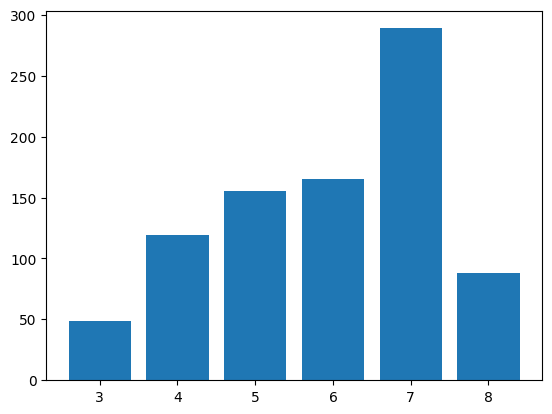

In [2]:
vin_data = pd.read_csv("https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h20/datafiler/vin.csv")
plt.bar(vin_data["quality"], vin_data["total sulfur dioxide"])
plt.show()
# TODO legge akser

In [3]:
vin_data["kvalitetskategoriene"] = vin_data["quality"].apply(lambda x: 0 if x < 6 else 1)
vin_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kvalitetskategoriene
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [4]:
# LogisticRegression

from sklearn.model_selection import cross_val_score


criteria = vin_data[['alcohol', 'pH', 'fixed acidity', 'density', 'total sulfur dioxide']] # features :, 'free sulfur dioxide', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates'
categories = vin_data['kvalitetskategoriene']                         # labels


ml_data = train_test_split(criteria, categories, train_size=0.8, random_state=42)

training_criteria = ml_data[0]
test_criteria = ml_data[1]
training_categories = ml_data[2]
test_categories = ml_data[3]

model = LogisticRegression(max_iter=20000)  # Makes the model
model.fit(training_criteria, training_categories)   # Trains the model

predictions = model.predict(test_criteria)

# Perform 5-fold cross-validation
scores = cross_val_score(model, criteria, categories, cv=5, scoring='precision_macro')

# Print the mean precision score and its standard deviation
print(f'Precision: {scores.mean():.2f} (+/- {scores.std():.2f})')

Precision: 0.72 (+/- 0.03)


In [5]:
# tree.DecisionTreeClassifier

criteria = vin_data[['alcohol', 'pH', 'fixed acidity', 'density']] # features :, 'free sulfur dioxide', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates'
categories = vin_data['kvalitetskategoriene']                         # labels

ml_data = train_test_split(criteria, categories, train_size=0.8, random_state=42)

training_criteria = ml_data[0]
test_criteria = ml_data[1]
training_categories = ml_data[2]
test_categories = ml_data[3]

model = tree.DecisionTreeClassifier()  # Makes the model
model.fit(training_criteria, training_categories)   # Trains the model

predictions = model.predict(test_criteria)

precision = precision_score(test_categories, predictions, average='macro')

print(round(precision, 3))

0.734


In [6]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

criteria = vin_data[['alcohol', 'pH', 'fixed acidity', 'density', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']] # features
categories = vin_data['kvalitetskategoriene']                         # labels

ml_data = train_test_split(criteria, categories, train_size=0.8, random_state=42)

training_criteria = ml_data[0]
test_criteria = ml_data[1]
training_categories = ml_data[2]
test_categories = ml_data[3]

model = RandomForestClassifier()  # Makes the model
model.fit(training_criteria, training_categories)   # Trains the model

predictions = model.predict(test_criteria)

precision = precision_score(test_categories, predictions, average='macro')

print(precision)

0.8108108108108109


In [7]:
def birthday_simulation(n):
    trials = 10000
    matching_birthdays = 0
    matching_birthdays_tot = 0
    for i in range(trials):
        birthdays = [random.randint(1, 365) for j in range(n)]
        if len(birthdays) != len(set(birthdays)):
            matching_birthdays += 1
            matching_birthdays_tot += (len(birthdays)-len(set(birthdays)))
    return round(matching_birthdays/trials, 3), round(matching_birthdays_tot/trials, 3)

print('Sjansen for at minst 2 stykker har samme bursdag er:',birthday_simulation(26)[0])
print('Gjennomsnittlig mengde bursdager pr år er:', birthday_simulation(26)[1])


Sjansen for at minst 2 stykker har samme bursdag er: 0.59
Gjennomsnittlig mengde bursdager pr år er: 0.868


In [8]:
def huntington_simulation():
    trials = 10000
    disease_occurrence = 0
    for i in range(trials):
        father_allele = random.choice(['H', 'h'])
        mother_allele = 'h'
        child_genotype = father_allele + mother_allele
        if 'H' in child_genotype:
            disease_occurrence += 1
    return round(disease_occurrence/trials, 3)

print('Sjansen for at barnet får huntingsons er:', huntington_simulation())

Sjansen for at barnet får huntingsons er: 0.501


In [9]:
def huntington_simulation_mother():
    trials = 10000
    disease_occurrence = 0
    for i in range(trials):
        father_allele = random.choice(['H', 'h'])
        mother_allele = random.choice(['H', 'h'])
        child_genotype = father_allele + mother_allele
        if 'H' in child_genotype:
            disease_occurrence += 1
    return round(disease_occurrence/trials, 3)

print('Sjansen for at barnet får huntingsons er:', huntington_simulation_mother())

Sjansen for at barnet får huntingsons er: 0.755


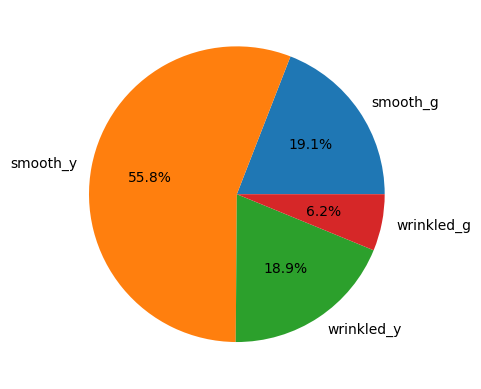

In [10]:
# Dihybrid Kryssning
def dihybrid_cross_simulation():
    trials = 10000
    results = {'smooth_g':0, 'smooth_y':0, 'wrinkled_y':0, 'wrinkled_g':0}

    for i in range(trials):
        father_allele = random.choice(['y', 'Y']) + random.choice(['r', 'R'])
        mother_allele = random.choice(['y', 'Y']) + random.choice(['r', 'R'])
        child_genotype = father_allele + mother_allele
        if 'R' in child_genotype:
            if 'Y' in child_genotype:
                results['smooth_y'] += 1    
            else:
                results['smooth_g'] += 1
        elif 'Y' in child_genotype:
            results['wrinkled_y'] += 1
        else:
            results['wrinkled_g'] += 1
            
    for key in results:
        results[key] /= trials
        
    return results

plt.pie(list(dihybrid_cross_simulation().values()), labels=dihybrid_cross_simulation().keys(), autopct='%1.1f%%')
plt.show()

In [23]:
def airplane_rnd_seating():
    moves = 0
    trials = 100000
    for i in range(trials):
        idiotpos = random.randint(0, 99)
        idiotseat = random.randint(0, 99)
        myseat = random.randint(0, 99)
        seats = [j for j in range(100)]

        while idiotpos != idiotseat and idiotpos != myseat:
            moves += 1
            seats.remove(idiotpos)
            idiotpos = random.choice(seats)
    return (moves/trials)

print(airplane_rnd_seating())

32.85055
